In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [45]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CICID2017/CIC-IDS-2017_sampledataset.csv')

In [46]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack
0,443,5808153,6,3,309,137,227,0,51.5,88.518360,...,20,134974.0,0.0,134974,134974,5673175.0,0.0,5673175,5673175,0
1,53,67371,1,1,51,179,51,51,51.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,80,85029043,6,7,345,11595,327,0,57.5,132.060214,...,20,10998.0,0.0,10998,10998,84900000.0,0.0,84900000,84900000,4
3,53,113515191,2,2,115,310,61,54,57.5,4.949747,...,20,30410.0,0.0,30410,30410,113423584.0,0.0,113423584,113423584,0
4,443,64051563,2,0,74,0,37,37,37.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0


In [47]:
df.shape

(76502, 79)

In [49]:
df['Attack'].value_counts()

,count
Attack,
0,38181
7,7935
11,5897
6,5796
5,5499
4,4015
10,2727
2,2096
1,1956


In [50]:
df['Attack'][df['Attack'] > 0] = 1

<ipython-input-50-c3523fdcb0c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attack'][df['Attack'] > 0] = 1


In [51]:
df.Attack.value_counts()

,count
Attack,
1,38321
0,38181


In [52]:
df.shape

(76502, 79)

In [53]:
features = df.drop(['Attack'],axis=1).dtypes.index

In [54]:
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))

In [55]:
df = df.fillna(0)

In [56]:
y = df.iloc[:, -1].values.reshape(-1,1)
X = df.drop(['Attack'],axis=1).values
y=np.ravel(y)

In [57]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y)

In [58]:
features = df.dtypes.index

In [59]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [60]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.44:
        break

In [61]:
df = df[fs]

In [62]:
df.head()

,Destination Port,Packet Length Variance,Packet Length Std,Packet Length Mean,Average Packet Size,Max Packet Length,Init_Win_bytes_forward,Total Length of Fwd Packets,Subflow Fwd Bytes,Fwd Packet Length Max,Fwd Packet Length Mean,Avg Fwd Segment Size,Avg Bwd Segment Size,Bwd Packet Length Mean,Total Length of Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward
0,-0.332553,-0.234001,-0.252646,-0.310709,-0.316607,-0.264610,-0.177702,-0.026123,-0.026123,0.049787,-0.040717,-0.040717,-0.307631,-0.307631,-0.020522,-0.020522,-0.257832
1,-0.357743,-0.234402,-0.259401,-0.124276,-0.008545,-0.292721,-0.720089,-0.040022,-0.040022,-0.202236,-0.043094,-0.043094,-0.042293,-0.042293,-0.020353,-0.020353,-0.261654
2,-0.355999,1.844198,2.782688,2.761964,2.628260,2.994424,-0.720023,-0.024183,-0.024183,0.192982,-0.012185,-0.012185,2.897842,2.897842,0.025750,0.025750,-0.232553
3,-0.357743,-0.234303,-0.257707,-0.116170,-0.078833,-0.264025,-0.720089,-0.036574,-0.036574,-0.187917,-0.012185,-0.012185,-0.090054,-0.090054,-0.019823,-0.019823,-0.261654
4,-0.332553,-0.238498,-0.400559,-0.339586,-0.296471,-0.375880,1.453499,-0.038783,-0.038783,-0.222283,-0.109668,-0.109668,-0.398509,-0.398509,-0.021075,-0.021075,-0.261654


In [63]:
df['Attack'] = y

In [64]:
df.shape

(76502, 18)

In [65]:
df_sampled = df.sample(frac=0.5, random_state=42)

In [67]:
x = df_sampled.drop('Attack', axis = 1)
x

,Destination Port,Packet Length Variance,Packet Length Std,Packet Length Mean,Average Packet Size,Max Packet Length,Init_Win_bytes_forward,Total Length of Fwd Packets,Subflow Fwd Bytes,Fwd Packet Length Max,Fwd Packet Length Mean,Avg Fwd Segment Size,Avg Bwd Segment Size,Bwd Packet Length Mean,Total Length of Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_backward
74415,-0.355999,-0.238498,-0.400559,-0.480171,-0.484470,-0.397549,1.213056,-0.042770,-0.042770,-0.275266,-0.285614,-0.285614,-0.398509,-0.398509,-0.021075,-0.021075,-0.261654
71594,-0.355999,-0.216119,-0.070592,-0.253884,-0.257516,-0.093021,1.213056,-0.013893,-0.013893,0.469348,0.224153,0.224153,-0.398509,-0.398509,-0.021075,-0.021075,-0.232553
63099,-0.359745,-0.211543,-0.038421,-0.145736,-0.180694,0.174027,1.213056,0.065409,0.065409,0.641182,0.169082,0.169082,-0.227802,-0.227802,-0.009990,-0.009990,-0.231073
18775,-0.332553,-0.220194,-0.102142,-0.217999,-0.227369,-0.094778,1.213056,-0.010499,-0.010499,0.465052,0.121303,0.121303,-0.292374,-0.292374,-0.020429,-0.020429,-0.254256
50776,-0.355999,-0.238498,-0.400559,-0.480171,-0.484470,-0.397549,1.213056,-0.042770,-0.042770,-0.275266,-0.285614,-0.285614,-0.398509,-0.398509,-0.021075,-0.021075,3.309509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64390,-0.359745,-0.238498,-0.400559,-0.480171,-0.484470,-0.397549,-0.702877,-0.042770,-0.042770,-0.275266,-0.285614,-0.285614,-0.398509,-0.398509,-0.021075,-0.021075,-0.229840
55994,-0.359810,-0.238449,-0.385120,-0.444708,-0.437047,-0.389350,-0.704863,-0.042015,-0.042015,-0.255218,-0.252327,-0.252327,-0.398509,-0.398509,-0.021075,-0.021075,-0.261654
53129,-0.359810,-0.238449,-0.385120,-0.453573,-0.452855,-0.389350,-0.704863,-0.042015,-0.042015,-0.255218,-0.252327,-0.252327,-0.398509,-0.398509,-0.021075,-0.021075,-0.261531
54896,-0.359810,-0.238375,-0.376095,-0.434728,-0.442269,-0.377637,1.213056,-0.036790,-0.036790,-0.238035,-0.226965,-0.226965,-0.373568,-0.373568,-0.020316,-0.020316,-0.233540


In [69]:
y = df_sampled['Attack']
y


Output hidden; open in https://colab.research.google.com to view.

In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.70, random_state=2)

In [71]:
X_train1 = X_train.values
x_test1 = X_test.values
y_train1 = Y_train.values
y_test1 = Y_test.values

In [72]:
X_train.shape

(26775, 17)

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn import metrics

In [74]:
# finding wcss values for different number of clusters
wcss = []
for i in range(1, 50):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
  kmeans.fit(X_train1)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

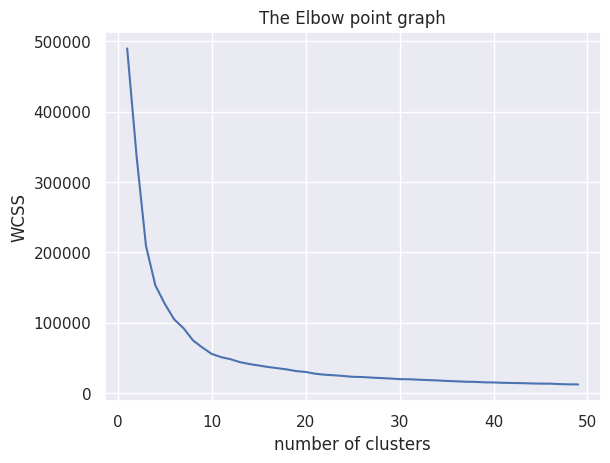

In [75]:
sns.set()
plt.plot(range(1, 50), wcss)
plt.title('The Elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [76]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [77]:
ssd =[]

for k in range(2,50):
    model = KMeans(n_clusters=k)
    model.fit(X_train1)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_train1, model.labels_)}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 2 clusters: 0.7446811441488816


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 3 clusters: 0.7427375719873532


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 4 clusters: 0.7382389671245079


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 5 clusters: 0.5485768803792093


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 6 clusters: 0.5304967542611037


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 7 clusters: 0.5853275454853563


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 8 clusters: 0.586622810970482


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 9 clusters: 0.5878750157471833


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 10 clusters: 0.6194502393644167


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 11 clusters: 0.6196064696175375


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 12 clusters: 0.6310504282827553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 13 clusters: 0.6314019911565641


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 14 clusters: 0.6305695018827121


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 15 clusters: 0.6472295170428534


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 16 clusters: 0.6368042067969286


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 17 clusters: 0.6508487338170478


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 18 clusters: 0.6413860961451315


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 19 clusters: 0.5318335268176574


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 20 clusters: 0.6442154213376486


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 21 clusters: 0.6480029222101832


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 22 clusters: 0.5403450788432319


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 23 clusters: 0.6546650808453794


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 24 clusters: 0.5512279537678741


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 25 clusters: 0.5705926851896295


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 26 clusters: 0.5689973344178556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 27 clusters: 0.5651339391421566


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 28 clusters: 0.5710188814636626


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 29 clusters: 0.5720462462482075


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 30 clusters: 0.5699899523109665


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 31 clusters: 0.5647175449445956


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 32 clusters: 0.5753897087627332


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 33 clusters: 0.576345312473183


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 34 clusters: 0.5785426976345358


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 35 clusters: 0.5749586484781772


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 36 clusters: 0.571751977112475


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 37 clusters: 0.5859367887946282


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 38 clusters: 0.5935872390281094


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 39 clusters: 0.5777215144785288


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 40 clusters: 0.5916312815962399


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 41 clusters: 0.5733648324491327


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 42 clusters: 0.5535096453673485


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 43 clusters: 0.5837086597197193


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 44 clusters: 0.5890225637352879


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 45 clusters: 0.556718590529476


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 46 clusters: 0.5978113280443841


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 47 clusters: 0.5723653257654462


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 48 clusters: 0.5963090175061948


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 49 clusters: 0.5629360588807117


In [78]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
import time

def CL_kmeans(X_train, X_test, y_train, y_test, n, b=100):
    start_time = time.time()

    km_cluster = MiniBatchKMeans(n_clusters=n, batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    cluster_creation_time = time.time() - start_time

    count = 0
    a = np.zeros(n)  # a[i] is normal samples in cluster i
    count_b = np.zeros(n)
    for v in range(0, n):
        for i in range(0, len(y_train)):
            if result[i] == v:
                if y_train[i] == 1:  # sample is an attack
                    a[v] = a[v] + 1
                else:
                    count_b[v] = count_b[v] + 1

    list1 = []  # normal cluster
    list2 = []  # attack cluster
    for v in range(0, n):
        if a[v] <= count_b[v]:
            list1.append(v)
        else:
            list2.append(v)

    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    for v in range(0, len(y_test)):
        if result2[v] in list1:
            result2[v] = 0
        elif result2[v] in list2:
            result2[v] = 1
        else:
            print("-1")

        if y_test[v] == 1 and result2[v] == 1:
            true_positives += 1
        elif y_test[v] == 0 and result2[v] == 1:
            false_positives += 1
        elif y_test[v] == 0 and result2[v] == 0:
            true_negatives += 1
        elif y_test[v] == 1 and result2[v] == 0:
            false_negatives += 1

    print("True Positives:", true_positives)
    print("False Positives:", false_positives)
    print("True Negatives:", true_negatives)
    print("False Negatives:", false_negatives)

    print(classification_report(y_test, result2))
    cm = confusion_matrix(y_test, result2)
    acc = metrics.accuracy_score(y_test, result2)
    print(str(acc))
    print(cm)

    classification_time = time.time() - cluster_creation_time - start_time
    print("Cluster Creation Time:", cluster_creation_time)
    print("Classification Time:", classification_time)

    cm_df = pd.DataFrame(
        [[true_negatives, false_positives], [false_negatives, true_positives]],
        index=["Actual 0", "Actual 1"],
        columns=["Predicted 0", "Predicted 1"],
    )

    # Plot the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [79]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(26775, 17) (11476, 17) (26775,) (11476,)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


True Positives: 5639
False Positives: 99
True Negatives: 5652
False Negatives: 86
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5751
           1       0.98      0.98      0.98      5725

    accuracy                           0.98     11476
   macro avg       0.98      0.98      0.98     11476
weighted avg       0.98      0.98      0.98     11476

0.983879400487975
[[5652   99]
 [  86 5639]]
Cluster Creation Time: 59.64562177658081
Classification Time: 439.4562659263611


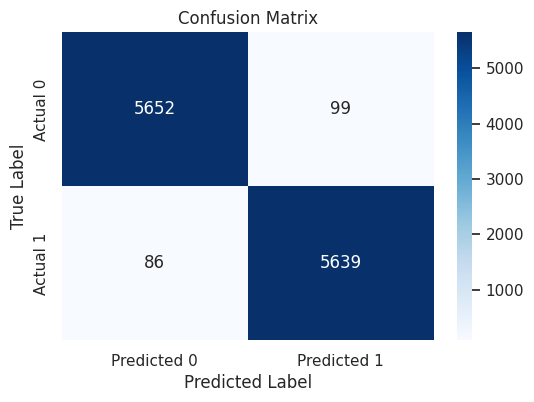

In [80]:
CL_kmeans(X_train1, x_test1, y_train1, y_test1, 6700)